In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold


from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

from collections import Counter

In [2]:
df = pd.read_excel('nut_data.xlsx')
df

,khana.com data set,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 107,Unnamed: 108,Unnamed: 109,Unnamed: 110,Unnamed: 111,Unnamed: 112,Unnamed: 113,Unnamed: 114,Unnamed: 115,Unnamed: 116
0,Download by click on this file,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Download by login into google account,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ID,name,Food Group,Calories,Fat (g),Protein (g),Carbohydrate (g),Sugars (g),Fiber (g),Cholesterol (mg),...,Serving Description 5 (g),Serving Weight 6 (g),Serving Description 6 (g),Serving Weight 7 (g),Serving Description 7 (g),Serving Weight 8 (g),Serving Description 8 (g),Serving Weight 9 (g),Serving Description 9 (g),200 Calorie Weight (g)
3,167512,Pillsbury Golden Layer Buttermilk Biscuits Art...,Baked Foods,307,13.24,5.88,41.18,5.88,1.2,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.147
4,167513,Pillsbury Cinnamon Rolls With Icing Refrigerat...,Baked Foods,330,11.27,4.34,53.42,21.34,1.4,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14162,789766,Cheese As Ingredient In Sandwiches,NaN,359,28.73,20.65,4.57,2.4,0,90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.71
14163,789767,Breading Or Batter As Ingredient In Food,NaN,201,1.39,6.32,39.64,0.68,1.6,19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.502
14164,789768,Wheat Bread As Ingredient In Sandwiches,NaN,263,3.96,11.45,45.29,5.18,5.4,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76.046
14165,789769,Sauce As Ingredient In Hamburgers,NaN,271,22.85,1.29,17.19,13.02,0.6,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73.801


In [3]:
df.columns = df.loc[2].values

In [4]:
df.drop(index=[0, 1, 2], inplace=True)

In [5]:
df.reset_index(inplace=True)

In [6]:
df.drop(columns=['index', 'ID'], inplace=True)

### Loading Dataset

### Dealing with Missing Values

In [7]:
df.isna()

,name,Food Group,Calories,Fat (g),Protein (g),Carbohydrate (g),Sugars (g),Fiber (g),Cholesterol (mg),Saturated Fats (g),...,Serving Description 5 (g),Serving Weight 6 (g),Serving Description 6 (g),Serving Weight 7 (g),Serving Description 7 (g),Serving Weight 8 (g),Serving Description 8 (g),Serving Weight 9 (g),Serving Description 9 (g),200 Calorie Weight (g)
0,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,False
1,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,False
2,False,False,False,False,False,False,True,True,True,True,...,True,True,True,True,True,True,True,True,True,False
3,False,False,False,False,False,False,True,True,True,False,...,True,True,True,True,True,True,True,True,True,False
4,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14159,False,True,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,False
14160,False,True,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,False
14161,False,True,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,False
14162,False,True,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,False


In [8]:
# Dropping columns which do not have any values

df.dropna(axis='columns', how='all', inplace = True)

In [9]:
# check number of columns that have at least 25% missing values 

count = 0
bad_features = []
for x in df.columns:
    if df[x].isna().sum() > 0.25*df.shape[0]:
        count += 1
        bad_features.append(x)
        
print(f'Number of columns that have at least 25% missing values: {count}')
print(f'Columns that have at least 25% missing values: {bad_features}')

Number of columns that have at least 25% missing values: 54
Columns that have at least 25% missing values: ['Vitamin A, IU (IU)', 'Trans Fatty Acids (g)', 'Sucrose (g)', 'Glucose (Dextrose) (g)', 'Fructose (g)', 'Lactose (g)', 'Maltose (g)', 'Galactose (g)', 'Starch (g)', 'Manganese (mg)', 'Fluoride, F (mcg)', 'Pantothenic acid (B5) (mg)', 'Betaine (mg)', 'Vitamin D2 (ergocalciferol) (mcg)', 'Vitamin D3 (cholecalciferol) (mcg)', 'Vitamin D (IU) (IU)', 'Dihydrophylloquinone (mcg)', 'Menaquinone-4 (mcg)', '18:3 n-3 c,c,c (ALA) (mg)', 'Tryptophan (mg)', 'Threonine (mg)', 'Isoleucine (mg)', 'Leucine (mg)', 'Lysine (mg)', 'Methionine (mg)', 'Cystine (mg)', 'Phenylalanine (mg)', 'Tyrosine (mg)', 'Valine (mg)', 'Arginine (mg)', 'Histidine (mg)', 'Alanine (mg)', 'Aspartic acid (mg)', 'Glutamic acid (mg)', 'Glycine (mg)', 'Proline (mg)', 'Serine (mg)', 'Hydroxyproline (mg)', 'Serving Weight 2 (g)', 'Serving Description 2 (g)', 'Serving Weight 3 (g)', 'Serving Description 3 (g)', 'Serving Weight

In [10]:
bad_features.append('name')

In [11]:
# Dropping columns that have at least 25% missing values

df = df.drop(columns=bad_features)

In [12]:
df.columns

Index(['Food Group', 'Calories', 'Fat (g)', 'Protein (g)', 'Carbohydrate (g)',
       'Sugars (g)', 'Fiber (g)', 'Cholesterol (mg)', 'Saturated Fats (g)',
       'Calcium (mg)', 'Iron, Fe (mg)', 'Potassium, K (mg)', 'Magnesium (mg)',
       'Vitamin A, RAE (mcg)', 'Vitamin C (mg)', 'Vitamin B-12 (mcg)',
       'Vitamin D (mcg)', 'Vitamin E (Alpha-Tocopherol) (mg)', 'Net-Carbs (g)',
       'Water (g)', 'Omega 3s (mg)', 'Omega 6s (mg)', 'PRAL score',
       'Phosphorus, P (mg)', 'Sodium (mg)', 'Zinc, Zn (mg)', 'Copper, Cu (mg)',
       'Selenium, Se (mcg)', 'Thiamin (B1) (mg)', 'Riboflavin (B2) (mg)',
       'Niacin (B3) (mg)', 'Vitamin B6 (mg)', 'Folate (B9) (mcg)',
       'Folic acid (mcg)', 'Food Folate (mcg)', 'Folate DFE (mcg)',
       'Choline (mg)', 'Retinol (mcg)', 'Carotene, beta (mcg)',
       'Carotene, alpha (mcg)', 'Lycopene (mcg)', 'Lutein + Zeaxanthin (mcg)',
       'Vitamin K (mcg)', 'Fatty acids, total monounsaturated (mg)',
       'Fatty acids, total polyunsaturated (mg

In [13]:
# dropping columns with description

df = df.drop(columns=['Serving Weight 1 (g)',
       'Serving Description 1 (g)'])

### Separating features and target value

In [14]:
X = df.drop(columns='Food Group')
y = df['Food Group']

df[X.columns] = df[X.columns].astype(float)

### Feature Selection

There are 55 features after eliminating columns that have more than 25% missing values. The most important features will be selected to speed up the training of model, prevent overfitting and improve the model's performance

In [15]:
# The data is first split into training and testing data before feature selection, to prevent data leakage

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [16]:
# Imputer to fill in missing values

imputed_X_train = pd.DataFrame(SimpleImputer(strategy='median').fit_transform(X_train))
imputed_X_train.columns = X_train.columns

y_train.fillna('Missing', inplace=True)

In [17]:
# Feature Selector

selector = SelectKBest(f_classif, k=20)
X_fit = selector.fit(imputed_X_train, y_train)
X_new = selector.fit_transform(imputed_X_train, y_train)

In [18]:
# Check score of each selected feature

df_scores = pd.DataFrame(X_fit.scores_)
df_columns = pd.DataFrame(X_train.columns)

feature_scores = pd.concat([df_columns, df_scores],axis=1)
feature_scores.columns = ['Feature Name','Score']

feature_scores.set_index('Feature Name', inplace=True)
feature_scores.head(20).sort_values(by='Score', ascending=False)

,Score
Feature Name,
Carbohydrate (g),793.946545
Net-Carbs (g),768.453806
Protein (g),763.240123
Water (g),588.461704
Calories,560.338030
Fat (g),459.890620
Sugars (g),316.097407
Fiber (g),299.306813
Magnesium (mg),276.969599


In [19]:
# Get back the features we've kept, zero out all other features

selected_features = pd.DataFrame(selector.inverse_transform(X_new), columns=X_train.columns)

# Dropped columns have values of all 0s, so var is 0, drop them
selected_columns = selected_features.columns[selected_features.var() != 0]
print(selected_columns)
print(selected_columns.shape)

Index(['Calories', 'Fat (g)', 'Protein (g)', 'Carbohydrate (g)', 'Sugars (g)',
       'Fiber (g)', 'Saturated Fats (g)', 'Calcium (mg)', 'Iron, Fe (mg)',
       'Magnesium (mg)', 'Net-Carbs (g)', 'Water (g)', 'Omega 6s (mg)',
       'PRAL score', 'Phosphorus, P (mg)', 'Niacin (B3) (mg)',
       'Folic acid (mcg)', 'Choline (mg)',
       'Fatty acids, total monounsaturated (mg)',
       'Fatty acids, total polyunsaturated (mg)'],
      dtype='object')
(20,)


### Create New Dataset with relevant features

In [20]:
# Create new dataframe from original data set, but with selected features

new_df = pd.concat([df['Food Group'], df[selected_columns]], axis=1)
new_df

,Food Group,Calories,Fat (g),Protein (g),Carbohydrate (g),Sugars (g),Fiber (g),Saturated Fats (g),Calcium (mg),"Iron, Fe (mg)",...,Net-Carbs (g),Water (g),Omega 6s (mg),PRAL score,"Phosphorus, P (mg)",Niacin (B3) (mg),Folic acid (mcg),Choline (mg),"Fatty acids, total monounsaturated (mg)","Fatty acids, total polyunsaturated (mg)"
0,Baked Foods,307.0,13.24,5.88,41.18,5.88,1.2,2.941,NaN,2.12,...,39.98,35.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Baked Foods,330.0,11.27,4.34,53.42,21.34,1.4,3.250,28.0,1.93,...,52.02,27.86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Baked Foods,377.0,3.70,6.10,79.80,NaN,NaN,NaN,NaN,NaN,...,79.80,3.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Baked Foods,232.0,1.80,8.00,46.00,NaN,NaN,0.308,180.0,1.40,...,46.00,42.60,841.0,NaN,NaN,NaN,NaN,NaN,303.0,920.0
4,Baked Foods,273.0,9.22,6.58,41.05,4.30,2.2,1.898,279.0,6.04,...,38.85,40.34,1414.0,10.795,388.0,6.675,49.0,NaN,4530.0,1445.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14159,NaN,359.0,28.73,20.65,4.57,2.40,0.0,16.492,959.0,0.47,...,4.57,40.73,947.0,16.051,604.0,0.100,0.0,26.6,7600.0,1191.0
14160,NaN,201.0,1.39,6.32,39.64,0.68,1.6,0.336,47.0,2.57,...,38.04,51.53,415.0,3.543,79.0,3.153,74.0,21.2,318.0,459.0
14161,NaN,263.0,3.96,11.45,45.29,5.18,5.4,0.716,161.0,3.12,...,39.89,37.06,1405.0,4.178,166.0,4.886,14.0,21.3,654.0,1560.0
14162,NaN,271.0,22.85,1.29,17.19,13.02,0.6,3.541,18.0,0.43,...,16.59,55.97,11804.0,-2.732,33.0,0.917,0.0,20.0,5280.0,13509.0


In [21]:
# Dropping rows with missing target value (Food Group)

index = new_df.loc[df['Food Group'].isnull()].index

new_df = new_df.drop(index=index)

In [22]:
# Splitting into training and test sets

X = new_df.drop(columns='Food Group')
y = new_df['Food Group']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Exploratory Data Analysis

In [23]:
new_df

,Food Group,Calories,Fat (g),Protein (g),Carbohydrate (g),Sugars (g),Fiber (g),Saturated Fats (g),Calcium (mg),"Iron, Fe (mg)",...,Net-Carbs (g),Water (g),Omega 6s (mg),PRAL score,"Phosphorus, P (mg)",Niacin (B3) (mg),Folic acid (mcg),Choline (mg),"Fatty acids, total monounsaturated (mg)","Fatty acids, total polyunsaturated (mg)"
0,Baked Foods,307.0,13.24,5.88,41.18,5.88,1.2,2.941,NaN,2.12,...,39.98,35.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Baked Foods,330.0,11.27,4.34,53.42,21.34,1.4,3.250,28.0,1.93,...,52.02,27.86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Baked Foods,377.0,3.70,6.10,79.80,NaN,NaN,NaN,NaN,NaN,...,79.80,3.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Baked Foods,232.0,1.80,8.00,46.00,NaN,NaN,0.308,180.0,1.40,...,46.00,42.60,841.0,NaN,NaN,NaN,NaN,NaN,303.0,920.0
4,Baked Foods,273.0,9.22,6.58,41.05,4.30,2.2,1.898,279.0,6.04,...,38.85,40.34,1414.0,10.795,388.0,6.675,49.0,NaN,4530.0,1445.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14154,Beverages,38.0,1.15,4.78,2.10,0.38,0.2,0.104,117.0,1.15,...,1.90,91.51,114.0,0.876,67.0,1.337,27.0,7.8,809.0,118.0
14155,Beverages,58.0,2.88,6.59,0.85,0.60,0.4,0.450,130.0,0.96,...,0.45,88.33,518.0,1.637,136.0,2.390,41.0,0.0,2100.0,290.0
14156,Beverages,58.0,2.88,6.59,0.85,0.60,0.4,0.450,130.0,0.96,...,0.45,88.33,518.0,1.637,136.0,2.390,41.0,0.0,2100.0,290.0
14157,Baby Foods,380.0,0.60,35.20,58.40,2.00,37.5,0.236,115.0,2.00,...,20.90,3.95,354.0,7.783,69.0,27.650,0.0,76.7,146.0,400.0


Let's have a closer look at our target variable - Food group. Machine learning models will be trained with the features above, and used to classify our data into one of the following groups:

In [24]:
print(new_df['Food Group'].unique())

['Baked Foods' 'Snacks' 'Sweets' 'Vegetables' 'American Indian'
 'Restaurant Foods' 'Beverages' 'Fats and Oils' 'Meats'
 'Dairy and Egg Products' 'Baby Foods' 'Breakfast Cereals'
 'Soups and Sauces' 'Beans and Lentils' 'Fish' 'Fruits' 'Grains and Pasta'
 'Nuts and Seeds' 'Prepared Meals' 'Fast Foods' 'Spices and Herbs'
 'Dairy and Egg Products ']


##### Summary Statistics of selected features

All selected features are of numerical values, so there is no need for encoding in our preprocessing stage. However, the range of these values differ greatly, therefore scaling will be needed as the models to be used will take into account the 'distant' of each features. 

In [25]:
new_df.describe()

,Calories,Fat (g),Protein (g),Carbohydrate (g),Sugars (g),Fiber (g),Saturated Fats (g),Calcium (mg),"Iron, Fe (mg)",Magnesium (mg),Net-Carbs (g),Water (g),Omega 6s (mg),PRAL score,"Phosphorus, P (mg)",Niacin (B3) (mg),Folic acid (mcg),Choline (mg),"Fatty acids, total monounsaturated (mg)","Fatty acids, total polyunsaturated (mg)"
count,14036.000000,14036.000000,14036.000000,14036.000000,12264.000000,13485.000000,13695.000000,13951.000000,13956.000000,13680.000000,14036.000000,14036.000000,13295.000000,13637.000000,13726.000000,13663.000000,12768.000000,10878.000000,13523.000000,13524.000000
mean,193.324210,9.145658,10.117198,18.001676,6.339585,1.837011,2.998013,67.381263,1.986265,30.113743,16.236778,61.003206,1704.784731,3.232838,141.907038,2.862038,14.805529,38.414626,3482.371072,1964.077344
std,149.599346,13.447363,9.776474,22.219769,12.359168,3.388105,5.377403,158.376541,4.331201,46.038535,20.978820,26.808537,3888.201548,9.073155,169.870736,3.908723,79.107499,52.349796,5875.283002,4280.440427
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-348.122000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,80.000000,1.620000,2.170000,2.130000,0.260000,0.000000,0.400000,12.000000,0.520000,13.000000,1.420000,50.400000,174.000000,-1.294000,46.000000,0.510000,0.000000,10.500000,445.500000,270.000000
50%,157.000000,4.800000,6.800000,9.780000,1.840000,0.900000,1.430000,26.000000,1.100000,21.000000,8.225000,67.580000,611.000000,1.749000,112.000000,1.558000,0.000000,21.800000,1697.000000,784.000000
75%,267.000000,11.802500,16.985000,22.462500,5.502500,2.300000,3.631500,73.000000,2.052500,28.000000,19.722500,81.300000,1668.500000,8.763000,202.000000,4.205000,2.000000,56.275000,4387.000000,1985.250000
max,902.000000,100.000000,88.320000,100.000000,99.800000,79.000000,95.600000,7364.000000,123.600000,781.000000,100.000000,100.000000,74623.000000,270.152000,9918.000000,127.500000,2993.000000,2403.300000,83689.000000,74623.000000


#### Distribution of our top features: 

In [26]:
top = new_df.columns[1:9]
print(top)

Index(['Calories', 'Fat (g)', 'Protein (g)', 'Carbohydrate (g)', 'Sugars (g)',
       'Fiber (g)', 'Saturated Fats (g)', 'Calcium (mg)'],
      dtype='object')


Here is a visualisation of the nutritional information of each food group.

In [27]:
for group in new_df['Food Group'].unique():
    nut_info = []
    mean = []
    filt = (new_df['Food Group'] == group)
    filtered = new_df.loc[filt]
    for item in ['Fat (g)', 'Protein (g)', 'Carbohydrate (g)',
       'Sugars (g)', 'Fiber (g)', 'Saturated Fats (g)']:
        nut_info.append(item)
        mean.append(filtered[item].mean())

Random Forest
1) calculation of entropy for every attribute
2) Based on the entropy gain the decision tree is made
3) The selected higher entropy attribute is selected and then new data set is created and entropy of that are again calculated.

In [28]:
# Setting up pipeline

# Preprocessing
process_cols = X.columns
process_t = Pipeline(steps=[
    ('Impute', SimpleImputer()), 
    ('Scaling', MinMaxScaler())])

preprocessor = ColumnTransformer(transformers=[('preprocess', process_t, process_cols)])

# Models
classifiers = [
    RandomForestClassifier(),
]

# Pipeline

# Find out best models

models = []
scores = []
best_models = []


for model in classifiers:
    print(model)
    pipeline = Pipeline(steps=[('preprocess', preprocessor), ('m', model)])
    pipeline.fit(X_train, y_train)
    score = pipeline.score(X_test, y_test)
    print(score)
    models.append(model)
    scores.append(score)
    
    if score >= 0.70:
        best_models.append(model)

RandomForestClassifier()
0.863960113960114


Gradient Boosting
It gives a prediction model in the form of an ensemble of weak prediction models, which are typically decision trees

1)calculating average in the dataset

2) deduct the avg value from the the real value.

3) draw the graph using [x,r] value.

In [29]:
# Setting up pipeline

# Preprocessing
process_cols = X.columns
process_t = Pipeline(steps=[
    ('Impute', SimpleImputer()), 
    ('Scaling', MinMaxScaler())])

preprocessor = ColumnTransformer(transformers=[('preprocess', process_t, process_cols)])

# Models
classifiers = [
    GradientBoostingClassifier()
]

# Pipeline

# Find out best models


for model in classifiers:
    print(model)
    pipeline = Pipeline(steps=[('preprocess', preprocessor), ('m', model)])
    pipeline.fit(X_train, y_train)
    score = pipeline.score(X_test, y_test)
    print(score)
    models.append(model)
    scores.append(score)
    
    if score >= 0.70:
        best_models.append(model)

GradientBoostingClassifier()
0.8304843304843305


MLP Classifier

MLPClassifier stands for Multi-layer Perceptron classifier which in the name itself connects to a Neural Network. Unlike other classification algorithms such as Support Vectors or Naive Bayes Classifier, MLPClassifier relies on an underlying Neural Network to perform the task of classification.

MLPClassifier trains iteratively since at each time step the partial derivatives of the loss function with respect to the model parameters are computed to update the parameters.



In [30]:
# Setting up pipeline

# Preprocessing
process_cols = X.columns
process_t = Pipeline(steps=[
    ('Impute', SimpleImputer()), 
    ('Scaling', MinMaxScaler())])

preprocessor = ColumnTransformer(transformers=[('preprocess', process_t, process_cols)])

# Models
classifiers = [
    MLPClassifier()
]

# Pipeline

# Find out best models



for model in classifiers:
    print(model)
    pipeline = Pipeline(steps=[('preprocess', preprocessor), ('m', model)])
    pipeline.fit(X_train, y_train)
    score = pipeline.score(X_test, y_test)
    print(score)
    models.append(model)
    scores.append(score)
    
    if score >= 0.70:
        best_models.append(model)

MLPClassifier()
0.7222222222222222


/home/varun/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [31]:
best_models

[RandomForestClassifier(), GradientBoostingClassifier(), MLPClassifier()]

In [32]:
models = [str(x).strip('()') for x in models]
# models

In [33]:
df_scores = pd.DataFrame(scores)
df_models = pd.DataFrame(models)

model_scores = pd.concat([df_models, df_scores],axis=1)
model_scores.columns = ['Model','Score']

model_scores.set_index('Model', inplace=True)
model_scores = model_scores.sort_values(by='Score', ascending=False)

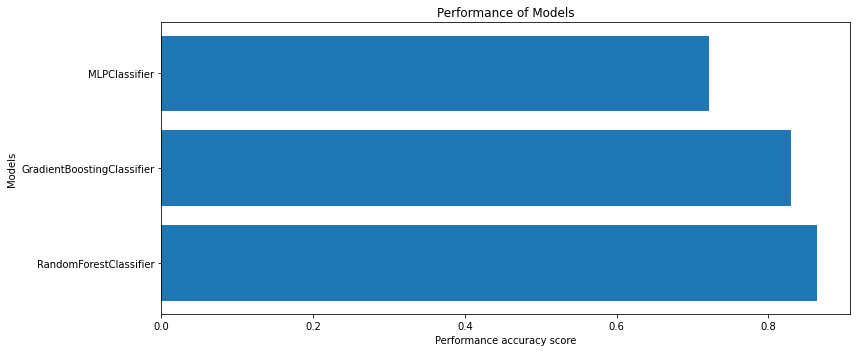

In [34]:
plt.figure(figsize=(12,5))
plt.barh(models, scores) 
plt.title('Performance of Models') 
plt.ylabel('Models') 
plt.xlabel('Performance accuracy score') 
plt.tight_layout()
plt.show()